In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 

In [2]:
#Read the data
data_df = pd.read_csv("creditcard.csv")

In [3]:
#Check data features
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check missing data

In [5]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

##### Let's check data imbalance with respect with target value, i.e. Class.

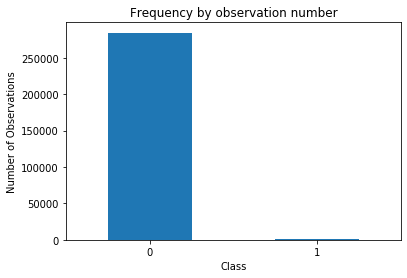

In [6]:
classes = data_df['Class'].value_counts()
normal_share = classes[0]/data_df['Class'].count()*100
fraud_share = classes[1]/data_df['Class'].count()*100

plt.xlabel("Class")
plt.ylabel("Number of Observations")
classes.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

In [7]:
print("Fraud count : ",classes[1])
print("%Fraud : ",fraud_share)

Fraud count :  492
%Fraud :  0.1727485630620034


In [8]:
print("Non-Fraud count : ",classes[0])
print("%Non-Fraud : ",normal_share)

Non-Fraud count :  284315
%Non-Fraud :  99.82725143693798


Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly imbalanced with respect to target variable Class.

### Exploratory Data Analysis

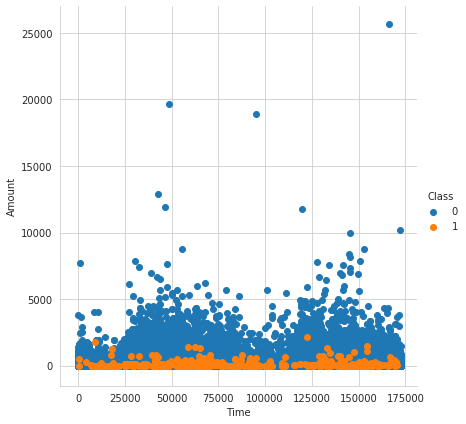

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(data_df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

1. From the above plot it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500.
2. The frauds in the transactions are evenly distributed throughout time.

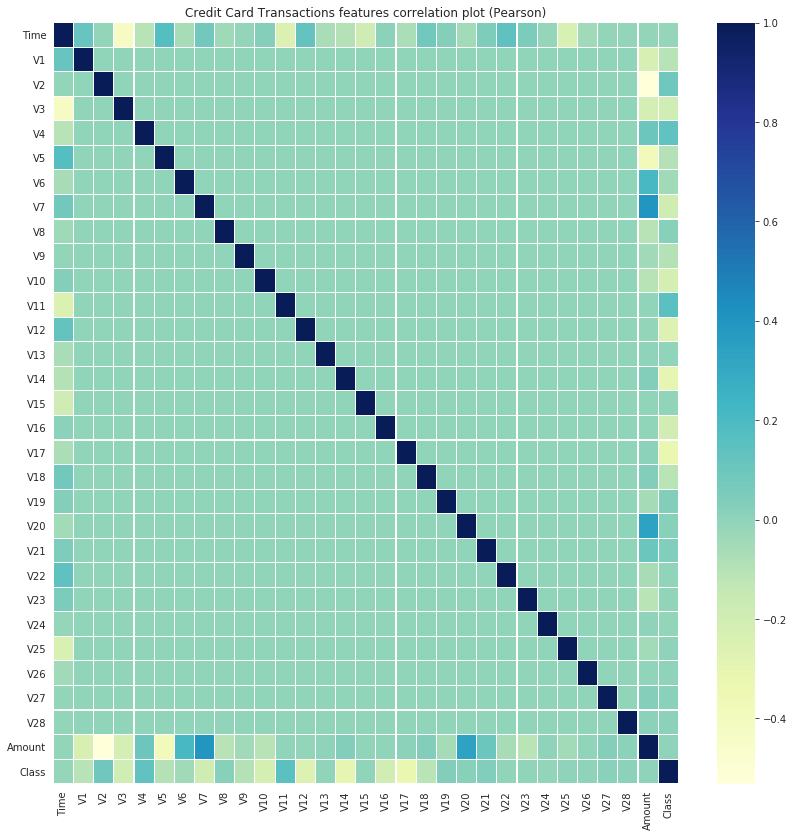

In [10]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="YlGnBu")
plt.show()

There are certain correlations between some of these features and 
1. Time : inverse correlation with V3 
2. Amount : direct correlation with V7 and V20 and inverse correlation with V1 and V5

<Figure size 432x288 with 0 Axes>

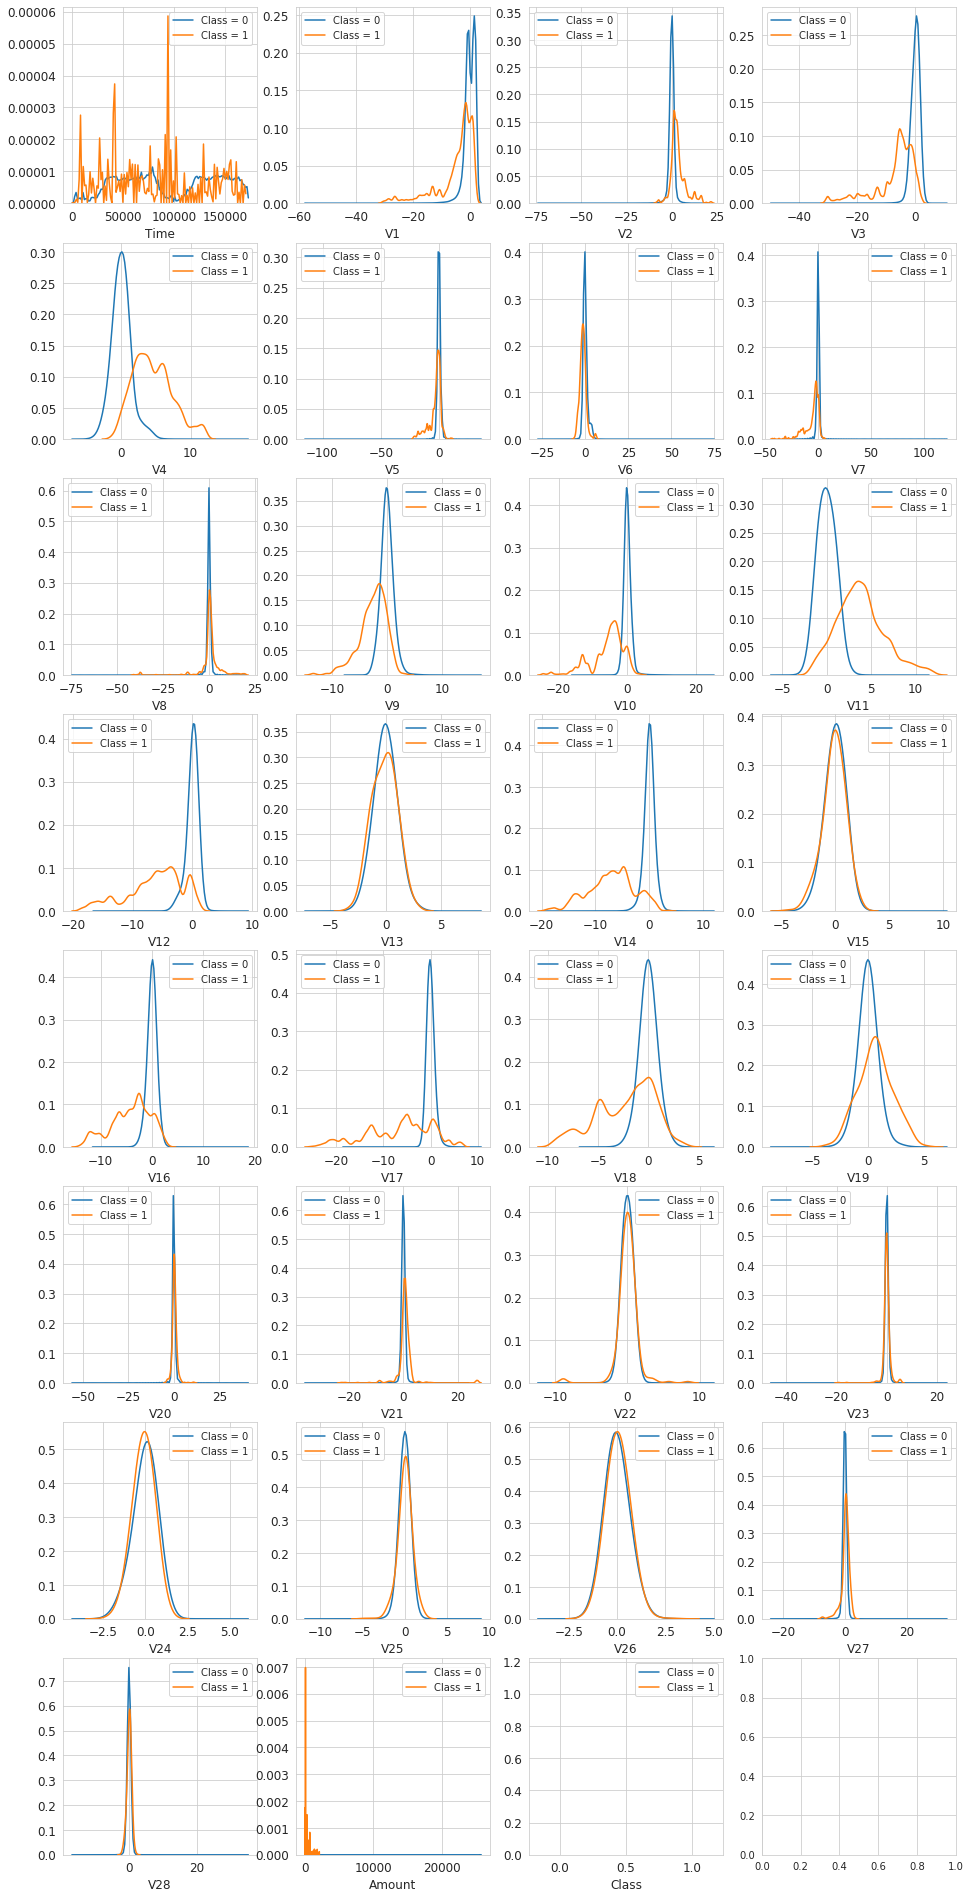

In [11]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,34))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

1. V4, V11 have clearly separated distributions
2. V12, V14, V18 are partially separated
3. V25, V26, V28 have similar distributions

##### Let's define the predictor features and the target features

In [12]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#### Split data in train and test set

In [13]:
train_df, test_df = train_test_split(data_df, test_size=0.30, random_state=2018, shuffle=True )

## Model Building

Build different models on the imbalanced dataset and see the result.

### Logistic Regression

In [14]:
y = data_df.loc[:,data_df.columns == 'Class']
X = data_df.loc[:,data_df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 12)

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

#### Area under curve

In [15]:
roc_auc_score(y_test, y_pred)

0.8229006360563359

The ROC-AUC score obtained with Logistic Regression is <b>0.82</b>

### Random Forest

In [16]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [17]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [18]:
#predict the target values for the test_df data
preds = clf.predict(test_df[predictors])

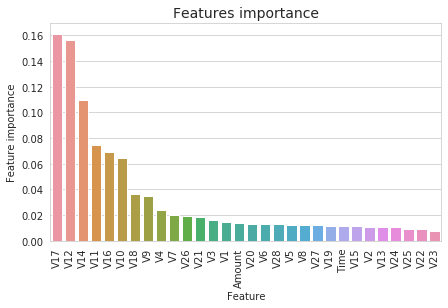

In [19]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

The most important features are <b>V17, V12, V14, V11, V16, V10</b>

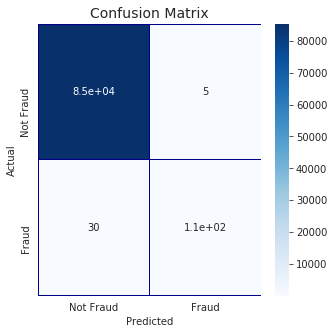

In [20]:
cm = pd.crosstab(test_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#### Area under curve

roc_auc_score(test_df[target].values, preds)

The ROC-AUC score obtained with RandomForrest is <b>0.89</b>

### XGBoost

In [21]:
# Prepare the train and test datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

watchlist = [(dtrain, 'train')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 2018

In [22]:
# Train the model
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=50)

[14:49:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1593723605503/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.87523
Will train until train-auc hasn't improved in 50 rounds.
[50]	train-auc:0.92526
[100]	train-auc:0.93434
[150]	train-auc:0.97405
[200]	train-auc:0.98963
[250]	train-auc:0.99252
[300]	train-auc:0.99454
[350]	train-auc:0.99568
[400]	train-auc:0.99653
[450]	train-auc:0.99729
[500]	train-auc:0.99798
[550]	train-auc:0.99842
[600]	train-auc:0.99875
[650]	train-auc:0.99898
[700]	train-auc:0.99927
[750]	train-auc:0.99941
[800]	train-auc:0.99952
[850]	train-auc:0.99967
[900]	train-auc:0.99974
[950]	train-auc:0.99981
[999]	train-auc:0.99985


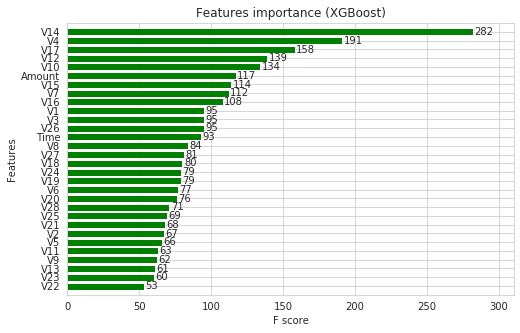

In [23]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [24]:
# Predict test set
preds = model.predict(dtest)

#### Area under curve

In [25]:
roc_auc_score(test_df[target].values, preds)

0.9763379762090196

The AUC score for the prediction of test set is <b>0.97</b>

#### Observations :
We started with <b>Logistic Regression</b>, for which we obtained an AUC scode of <b>0.82</b> when predicting the target for the test set.

We followed with an <b>RandomForestClassifier</b> model, with AUC score of <b>0.89</b> for prediction of the test set target values.

We then experimented with a <b>XGBoost</b> model to predict target value from the test data; the AUC score obtained was <b>0.97</b>.

## Model Building with balanced dataset

As we have observed, the data shows a high class imbalance. Over 2,00,000 cases are mapped to 0, but hardly 500 cases are mapped to 1. So to handle this and improve model performance we are goint to use Synthetic Minority Over-Sampling TEchnique (<b>SMOTE</b>).

In [26]:
from imblearn.over_sampling import SMOTE

df_features = data_df.loc[:,data_df.columns != 'Class']
df_target = data_df.loc[:,data_df.columns == 'Class']

In [29]:
sm = SMOTE(random_state=0)
x_res,y_res = sm.fit_sample(df_features,df_target)

In [30]:
data_df = pd.concat([x_res,y_res],axis=1)

In [31]:
train_df, test_df = train_test_split(data_df, test_size=0.30, random_state=2018, shuffle=True )

### Logistic Regression

In [32]:
y = data_df.loc[:,data_df.columns == 'Class']
X = data_df.loc[:,data_df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 12)

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

#### Area under curve

In [33]:
roc_auc_score(y_test, y_pred)

0.973437806531745

The ROC-AUC score obtained with Logistic Regression is <b>0.97</b>

### Random Forest

In [34]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [35]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [36]:
#predict the target values for the test_df data
preds = clf.predict(test_df[predictors])

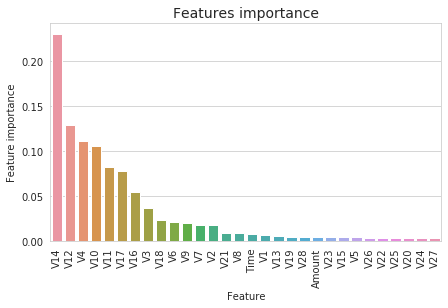

In [37]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

The most important features are <b>V14, V12, V4, V10, V11, V17</b>.

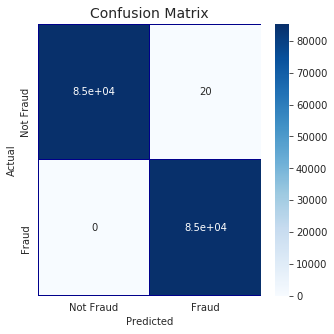

In [38]:
cm = pd.crosstab(test_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#### Area under curve

In [39]:
roc_auc_score(test_df[target].values, preds)

0.9998827680800929

The ROC-AUC score obtained with RandomForrest is <b>0.99</b>

### XGBoost

In [40]:
# Prepare the train and test datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

watchlist = [(dtrain, 'train')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 2018

In [41]:
# Train the model
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=50)

[14:53:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1593723605503/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.96061
Will train until train-auc hasn't improved in 50 rounds.
[50]	train-auc:0.99286
[100]	train-auc:0.99501
[150]	train-auc:0.99671
[200]	train-auc:0.99764
[250]	train-auc:0.99829
[300]	train-auc:0.99868
[350]	train-auc:0.99894
[400]	train-auc:0.99916
[450]	train-auc:0.99930
[500]	train-auc:0.99942
[550]	train-auc:0.99950
[600]	train-auc:0.99957
[650]	train-auc:0.99964
[700]	train-auc:0.99968
[750]	train-auc:0.99972
[800]	train-auc:0.99975
[850]	train-auc:0.99978
[900]	train-auc:0.99981
[950]	train-auc:0.99983
[999]	train-auc:0.99984


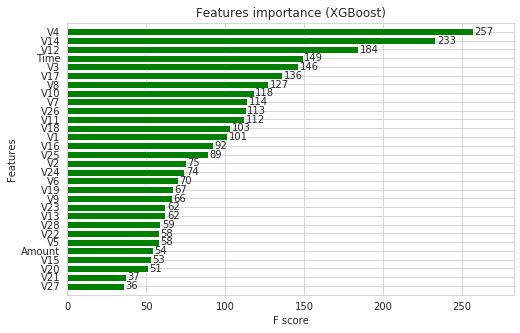

In [42]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [43]:
# Predict test set
preds = model.predict(dtest)

#### Area under curve

In [44]:
roc_auc_score(test_df[target].values, preds)

0.999834666814991

The AUC score for the prediction of test set is <b>0.99</b>


#### Observations :
After handling the class imbalance proble we can see the improvement in model purformance,
1. We started with <b>Logistic Regression</b>, for which we obtained an AUC score of <b>0.97</b> when predicting the target for the test set.

2. We followed with an <b>RandomForestClassifier</b> model, with AUC score of <b>0.99</b> for prediction of the test set target values.

3. We then experimented with a <b>XGBoost</b> model to predict target value from the test data; the AUC score obtained was <b>0.99</b>.